<a href="https://colab.research.google.com/github/Jawlie-8/PapayaCNN/blob/main/PapayaCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1. Mount Google Drive**

**Notes:. **

* This requires GDrive permissions.
* Update changes in local repository.
* Re-run cell for every commit changes in the repository.
* Colab is read only, unless set in GitHub FGPATs


pip install jupyterlab

pip install notebook

jupyter notebook

**GitHub Personal Access Tokens (PAT)**

1. Go to https://github.com/settings/tokens.
2. On the sidebar, select Fine-grained tokens.
3. Fill-up appropriate details, limit read/write access.
4. Copy generated PAT to local environment variables.
5. Do the same to Google Colab secrets.
6. Once expired, move the old repo in GDrive to trash.
















In [ ]:
import os

github_fgpat = None
live_on_colab = False
environment_ready = False

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

try:
    from google.colab import drive, userdata

    drive.mount("/content/drive")

    live_on_colab = True
    github_fgpat = userdata.get("PapayaCNN")
    print("Running on Google Colaboratory...")
except ImportError:
    print("Running locally...")

Mounted at /content/drive
Running on Google Colaboratory...


**Step 2. Check Colab Compute Engine Backend**
**Note:** Execute to verify HW accelerator allocation, use information on manuscript.

HW accelerator availability may vary, so ensure that the session is timed and is connected to expected runtime environment in all iterations. Options include:

1. NVIDIA A100 Tensor Core GPU - high-performance deep learning training (recommended).
2. NVIDIA L4 Tensor Core GPU - optimized for AI inference tasks with high performance and efficiency (preferred during HP fine-tuning).
3. NVIDIA T4 Tensor Core GPU - cost-effective, versatile, and suitable for a variety of tasks.

In [ ]:
if live_on_colab:
    NB = "/content/drive/MyDrive/Colab Notebooks"
    os.makedirs(NB, exist_ok=True)
    os.chdir(NB)

    def update_repo():

        REPO = f"{NB}/PapayaCNN"
        if not os.path.isdir(REPO):
            !git clone https://{github_fgpat}@github.com/Jawlie-8/PapayaCNN.git
            os.chdir(REPO)
            return

        os.chdir(REPO)
        !git reset --hard HEAD
        !git pull origin main

    update_repo()

print(os.getcwd())

Updating files: 100% (307/307), done.
HEAD is now at 01a7e2d [nb] Fix step 1
From https://github.com/Jawlie-8/PapayaCNN
 * branch            main       -> FETCH_HEAD
Already up to date.
/content/drive/MyDrive/Colab Notebooks/PapayaCNN


**Step 3. Change Working Directory**

**Note:** Execute cell to ensure the notebook is running under the latest version of project repository.

In [ ]:
if live_on_colab:
    NB = "/content/drive/MyDrive/Colab Notebooks"
    os.makedirs(NB, exist_ok=True)
    os.chdir(NB)

    def update_repo():

        REPO = f"{NB}/PapayaCNN"
        if not os.path.isdir(REPO):
            !git clone https://{github_fgpat}@github.com/Jawlie-8/PapayaCNN.git
            os.chdir(REPO)
            return

        os.chdir(REPO)
        !git reset --hard HEAD
        !git pull origin main

    update_repo()

print(os.getcwd())

Updating files: 100% (172/172), done.
HEAD is now at 01a7e2d [nb] Fix step 1
From https://github.com/Jawlie-8/PapayaCNN
 * branch            main       -> FETCH_HEAD
Already up to date.
/content/drive/MyDrive/Colab Notebooks/PapayaCNN


**Step 4. Install Dependencies**
Note: Execute cell everytime the Google Colab runtime environment reconnected.

In [ ]:
if live_on_colab:
    %pip install -U jupyterlab
    %pip install -U notebook
    %pip install -U opencv-python
    %pip install -U scikit-learn
    %pip install -U scikit-image
    %pip install -U matplotlib
    %pip install -U seaborn
    %pip install -U tensorflow
    %pip install -U tabulate
    print("Environment is ready...")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0
ERROR: pip's dependency resolver does not currently take into account all t

**Step 5: Import the Packages**

import all third party libraries necessary for the ANN model to execute successfully.

In [ ]:
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import glob
import json
import time
import warnings
from datetime import datetime

warnings.filterwarnings("ignore", category=RuntimeWarning, message="os.fork()")
warnings.filterwarnings("ignore", category=UserWarning, message="Your `PyDataset` class should call")

import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
)
from tensorflow.keras.optimizers import Adadelta


gpus = tf.config.list_physical_devices("GPU")

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
            print(e)
    print("GPU detected. Running on GPU.")
else:
    print("No GPU detected. Running on CPU.")

No GPU detected. Running on CPU.


**Step 6: Load Datasets**
Load and prepare the training and testing datasets.

In [ ]:
DATA_DIR = "data"
IMAGE_SIZE = 224
IMAGE_CHANNELS = 3
BATCH_SIZE = 8

all_images = glob.glob(f"{DATA_DIR}/preprocessed/*/*.jpg")
df = pd.DataFrame({
    "filepath": all_images,
    "label": [os.path.basename(os.path.dirname(p)) for p in all_images]
})

train_val_df, test_df = train_test_split(df, test_size=0.1, stratify=df["label"], shuffle=True)
train_df, val_df = train_test_split(
                       train_val_df,
                       test_size=0.2,
                       stratify=train_val_df["label"],
                       shuffle=True)

generator1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_data = generator1.flow_from_dataframe(
    train_df, x_col="filepath", y_col="label", target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True
)

NUM_CLASSES = max(train_data.classes) + 1

generator2 = ImageDataGenerator(rescale=1./255)

val_data = generator2.flow_from_dataframe(
    val_df, x_col="filepath", y_col="label", target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True
)

test_data = generator2.flow_from_dataframe(
    test_df, x_col="filepath", y_col="label", target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=False
)

Found 216 validated image filenames belonging to 3 classes.
Found 54 validated image filenames belonging to 3 classes.
Found 30 validated image filenames belonging to 3 classes.


**Step 7: Define the Architecture**

Define the structure of the CNN for Papaya classification.

In [ ]:
model = Sequential()

model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS)))

model.add(Conv2D(32, (3, 3), activation="swish", padding="same"))
model.add(Conv2D(32, (3, 3), activation="swish", padding="same"))
model.add(Conv2D(32, (3, 3), activation="swish", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="swish", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(32, activation="swish"))
model.add(Dense(32, activation="swish"))
model.add(Dropout(0.1))

model.add(Dense(NUM_CLASSES, activation="softmax"))

optimizer = Adadelta(learning_rate=1.0, rho=0.95)
model.compile(optimizer=optimizer, loss="categorical_crossentropy",
metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     6,422,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,461,603 (24.65 MB)

 Trainable params: 6,461,603 (24.65 MB)

 Non-trainable params: 0 (0.00 B)

**Step 8: Train the Model**

Feed the training-val dataset to the compiled CNN model.

In [13]:
EPOCHS = 100
MODELS = "models"
ANALYSIS = "analysis"
ARCHITECTURE = "CNN"

os.makedirs(MODELS, exist_ok=True)
os.makedirs(ANALYSIS, exist_ok=True)

training_timestamp = int(time.time())

history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

training_duration = (int(time.time()) - training_timestamp) / 60

fullpath = f"{MODELS}/topic.{ARCHITECTURE}_{training_timestamp}.keras"
model.save(fullpath)

with open(f"{ANALYSIS}/metrics_{training_timestamp}.json", "w") as f:
    json.dump({
        "loss": history.history["loss"],
        "accuracy": history.history["accuracy"],
        "val_loss": history.history["val_loss"],
        "val_accuracy": history.history["val_accuracy"]
    }, f, indent=4)

print(f"Training completed in {training_duration:.2f} minutes.")
print(f"Metrics saved to '{ANALYSIS}/metrics_{training_timestamp}.json'")
print(f"Model saved to '{fullpath}'")

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.3973 - loss: 1.2035 - val_accuracy: 0.5000 - val_loss: 1.0410
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.4035 - loss: 1.0717 - val_accuracy: 0.6481 - val_loss: 0.8966
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.5446 - loss: 0.9864 - val_accuracy: 0.7222 - val_loss: 0.7026
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.5612 - loss: 0.9107 - val_accuracy: 0.6481 - val_loss: 1.3749
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.5994 - loss: 0.9063 - val_accuracy: 0.7407 - val_loss: 0.6843
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.6215 - loss: 0.7713 - val_accuracy: 0.8148 - val_loss: 0.5030
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.6613 - loss: 0.7897 - val_accuracy: 0.8519 - val_loss: 0.5543
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.6850 - loss: 0.6932 - val_accuracy: 0.8333 - v

Step 9: Generate Training Analysis
Metrics Definitions

Loss is computed based on how far each prediction is from the ground truth, specifically using Categorical Cross-entropy. - Accuracy is the proportion of correct predictions to the total predictions.

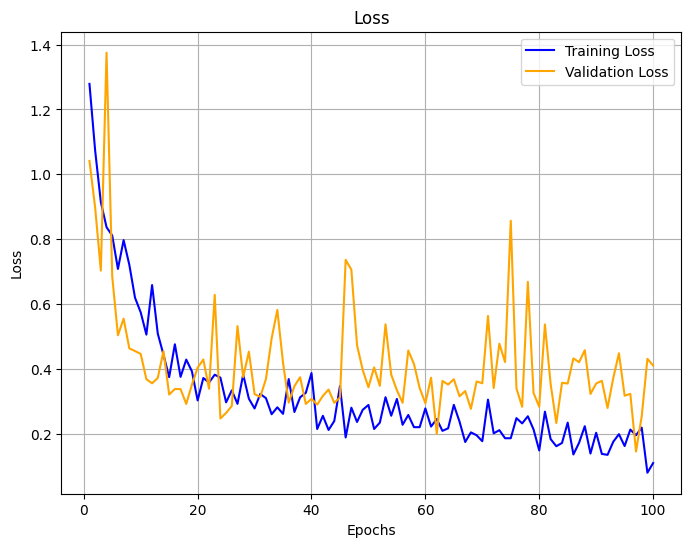

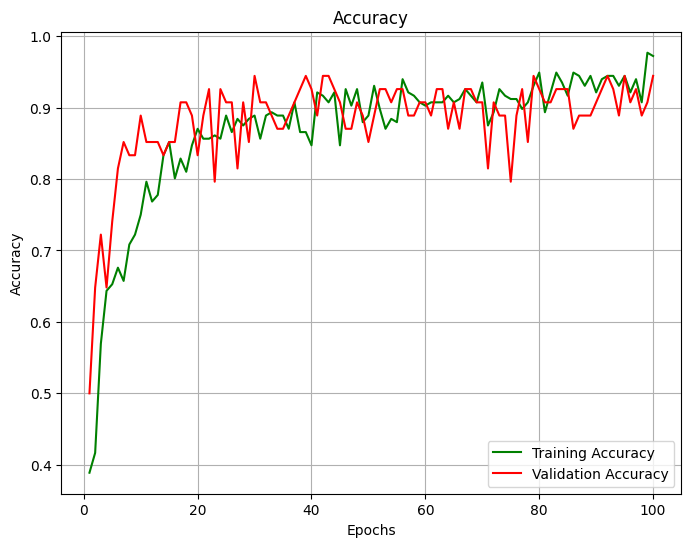


Plots saved to analysis directory.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

with open(f"{ANALYSIS}/metrics_{training_timestamp}.json", "r") as f:
    metrics = json.load(f)

epochs = [i for i in range(1, len(metrics["loss"])+1)]

plt.figure(figsize=(8, 6))
sns.lineplot(x=epochs, y=metrics["loss"], label="Training Loss", color="blue")
sns.lineplot(x=epochs, y=metrics["val_loss"], label="Validation Loss", color="orange")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.savefig(f"{ANALYSIS}/loss_plot_{training_timestamp}.png")
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(x=epochs, y=metrics["accuracy"], label="Training Accuracy", color="green")
sns.lineplot(x=epochs, y=metrics["val_accuracy"], label="Validation Accuracy", color="red")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig(f"{ANALYSIS}/accuracy_plot_{training_timestamp}.png")
plt.show()

print(f"\nPlots saved to {ANALYSIS} directory.")

**Step 10: Test the Model**

Run the model using the test dataset.

In [15]:
start_time = time.time()

results = model.predict(test_data, verbose=1)

prediction_duration = time.time() - start_time
image_prediction_time = prediction_duration / test_data.samples

predictions = (results > 0.5).astype("int32").flatten() if results.shape[1] == 1 else results.argmax(axis=1)

print(f"Total prediction time: {prediction_duration:.4f} seconds")
print(f"Time per image: {image_prediction_time:.4f} seconds")

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Total prediction time: 6.4789 seconds
Time per image: 0.2160 seconds


**Step 11: Display the Results**

Show the actual classes and predictions.

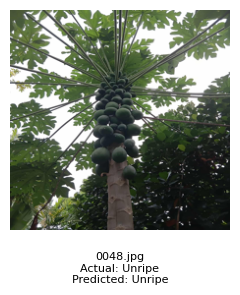

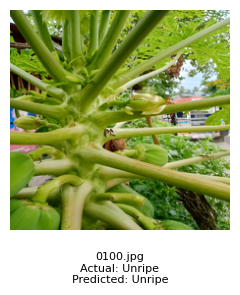

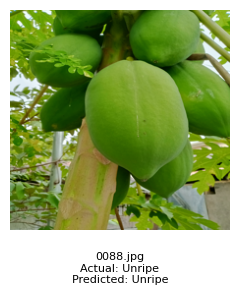

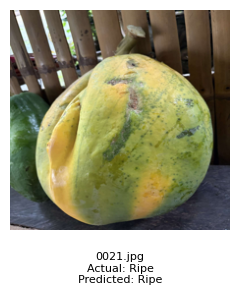

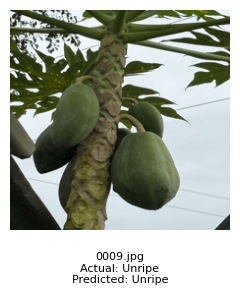

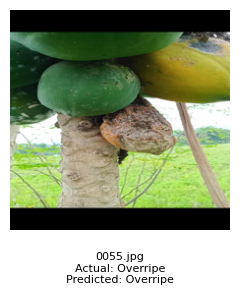

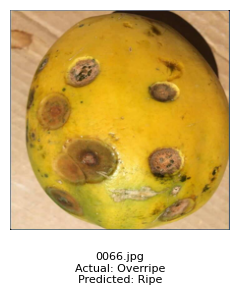

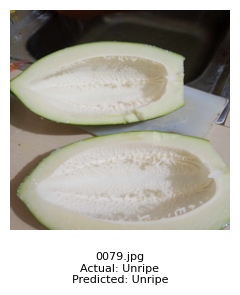

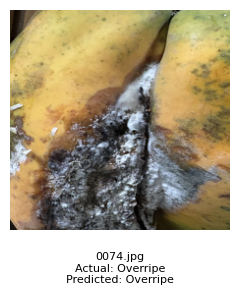

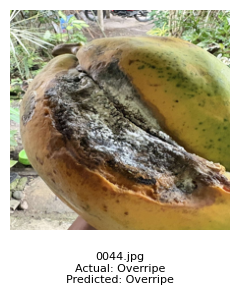

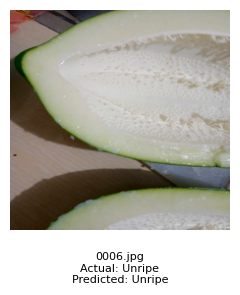

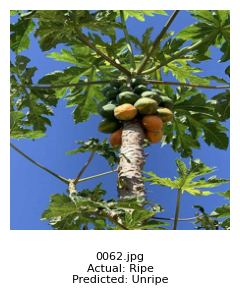

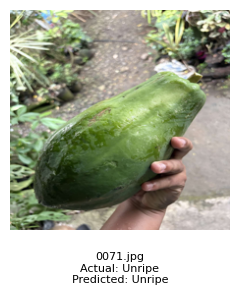

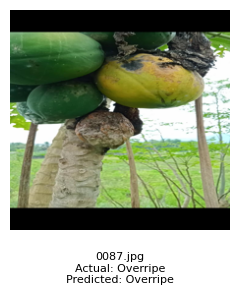

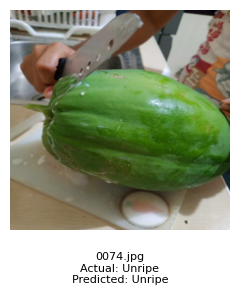

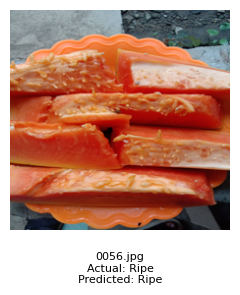

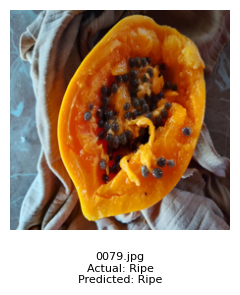

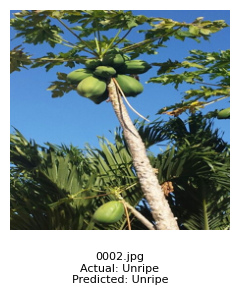

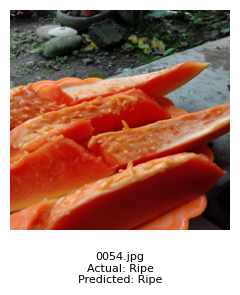

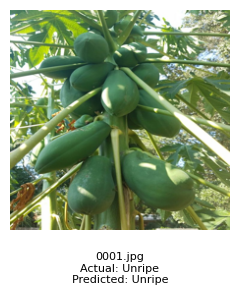

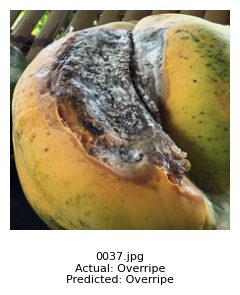

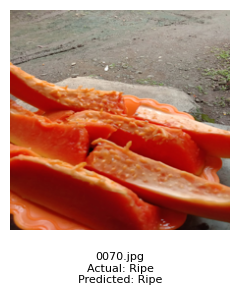

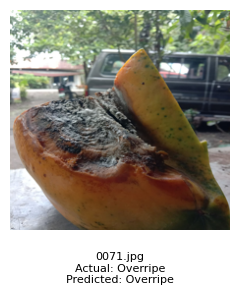

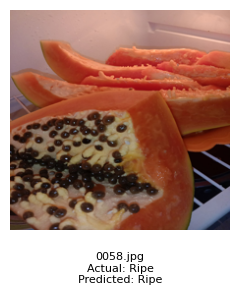

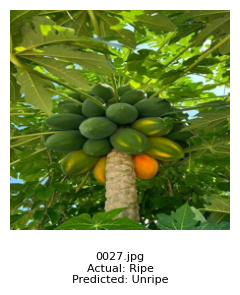

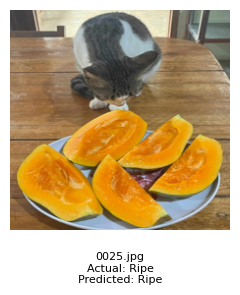

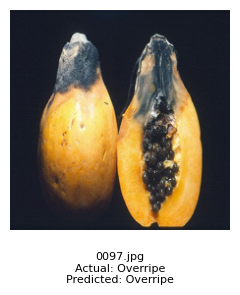

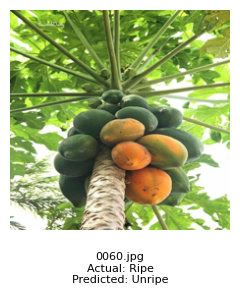

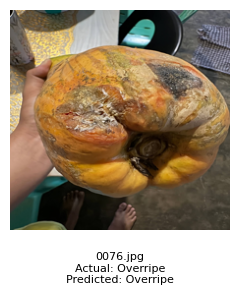

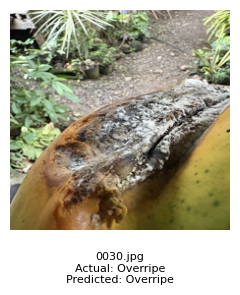

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os

# Get the file paths from the test_df DataFrame
filepaths = test_df["filepath"].tolist()

# Get the true indices from the test data generator
true_indices = test_data.classes

# Get the class labels mapping
labels = list(test_data.class_indices.keys())

# Ensure the number of filepaths, true indices, and predictions match
if len(filepaths) != len(true_indices) or len(filepaths) != len(predictions):
    print("Warning: Mismatch in the number of file paths, true labels, and predictions.")
    # You might want to handle this mismatch depending on the root cause

for fp, true, pred in zip(filepaths, true_indices, predictions):
    img = Image.open(fp).resize((224, 224))

    filename = os.path.basename(fp)
    actual = labels[true].replace("-", " ").title()
    predicted = labels[pred].replace("-", " ").title()

    plt.figure(figsize=(2.5, 3))
    plt.imshow(img)
    plt.axis('off')

    text = f"{filename}\nActual: {actual}\nPredicted: {predicted}"
    plt.text(0.5, -0.1, text, fontsize=8, ha="center", va="top", transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

**Step 12: Confusion Matrix with Cohen's Kappa Score Analysis**

The ideal matrix is a left-to-right diagonal; however, the Cohen's Kappa score is calculated to quantify the results.

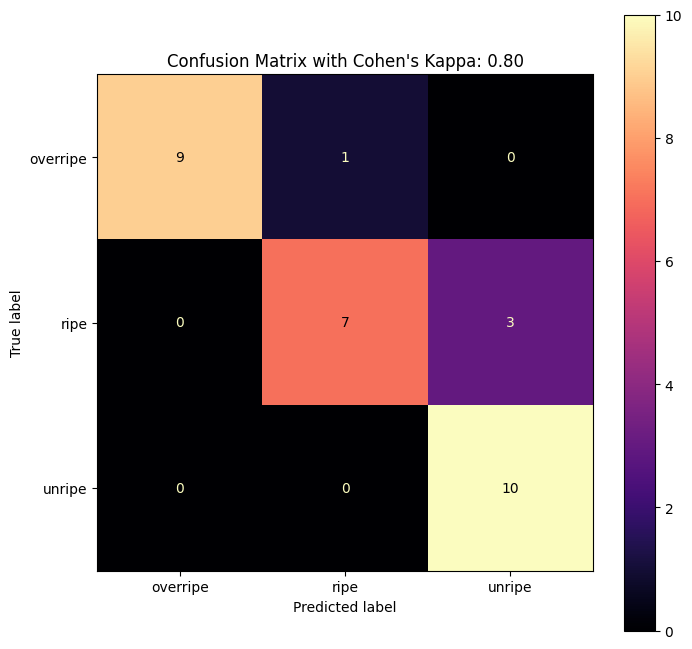

Interpretation of Kappa Score: Substantial agreement


In [17]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
)


true_indices = test_data.classes
class_labels = list(test_data.class_indices.keys())

cm = confusion_matrix(true_indices, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
kappa_score = cohen_kappa_score(true_indices, predictions)

fig, ax = plt.subplots(figsize=(8, 8))

disp.plot(cmap="magma", ax=ax)

plt.title(f"Confusion Matrix with Cohen's Kappa: {kappa_score:.2f}")
plt.savefig(f"{ANALYSIS}/confusion-matrix_{training_timestamp}.png")
plt.show()

# Landis & Koch (1977) scale
kappa_scale = {
    (-1.0, 0.00): "Poor agreement",
    (0.00, 0.20): "Slight agreement",
    (0.21, 0.40): "Fair agreement",
    (0.41, 0.60): "Moderate agreement",
    (0.61, 0.80): "Substantial agreement",
    (0.81, 1.00): "Almost perfect agreement"
}

for interval, label in kappa_scale.items():
    if interval[0] < kappa_score <= interval[1]:
        print(f"Interpretation of Kappa Score: {label}")
        break


End code.